In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# K Nearest Neighbours

It is a simple and intuitive machine learning algorithm used for both classification and regression tasks. It makes predictions based on the majority class (for classification) or the average value (for regression) of the k-nearest data points in the feature space. The *k* in KNN represents the number of nearest neighbors to consider, and predictions are made based on the labels or values of these neighbors.

[StatQuest: K-nearest neighbors, Clearly Explained](https://youtu.be/HVXime0nQeI?si=7lxurXSWOxKCi5aZ)

![knn|650](https://media.geeksforgeeks.org/wp-content/uploads/20231207103856/KNN-Algorithm-(1).png)

## Algorithm

1. **Load Data**: Load the dataset containing labeled data points.

2. **Choose K**: Determine the value of *k*, the number of nearest neighbors to consider.

3. **Calculate Distance**: Compute the distance between the query point (the point for which you want to make a prediction) and all other points in the dataset. The most common distance metric used is Euclidean distance, but other metrics like Manhattan distance or cosine similarity can be used based on the data.

4. **Find Neighbors**: Identify the *k* data points (neighbors) with the smallest distances to the query point. These are the nearest neighbors.

5. **Make Prediction**: For classification tasks, assign the label of the majority class among the *k* nearest neighbors to the query point. For regression tasks, predict the average of the target values of the *k* nearest neighbors.

6. **Return Prediction**: Return the predicted class label (for classification) or numerical value (for regression) as the final prediction for the query point.

[KNN Classification & Regression in Python](https://youtu.be/0RwM2BaLNkE?si=0bCD8dk9_s8cBW0O)

In [2]:
link = 'https://raw.githubusercontent.com/daaanishhh002/MachineLearning/main/Datasets/diabetes.csv'
df = pd.read_csv(link)

df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
41,7,133,84,0,0,40.2,0.696,37,0
148,5,147,78,0,0,33.7,0.218,65,0
481,0,123,88,37,0,35.2,0.197,29,0
381,0,105,68,22,0,20.0,0.236,22,0
734,2,105,75,0,0,23.3,0.560,53,0


In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.3,random_state=2002)

**Scaling is Necessary**

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7532467532467533

In [6]:
# finding optimal number of k
np.sqrt(df.shape[0])

27.712812921102035

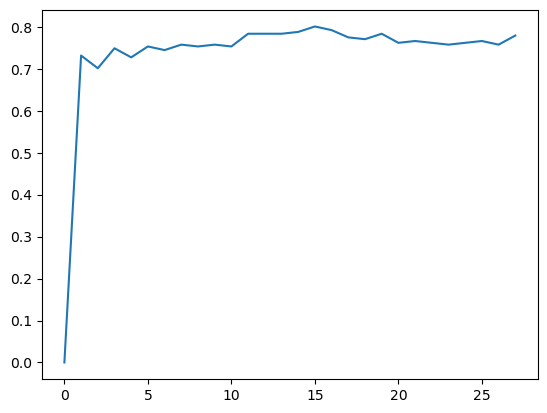

In [9]:
scores = [0]

for i in range(1,28):
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))

plt.plot(scores);

In [10]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8008658008658008

## Decision Boundary and Effect of *k*

- When *k* is small, the model is overfit
- When *k* is high, the model is underfit

![Decision Boundary|650](https://i0.wp.com/neptune.ai/wp-content/uploads/2022/10/KNN-diagram.png?resize=840%2C407&ssl=1)

### Plotting Decision Boundary

[KNN Visualisation in Few Lines](https://towardsdatascience.com/knn-visualization-in-just-13-lines-of-code-32820d72c6b6)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact, fixed

In [12]:
def load_data():
    cancer = datasets.load_breast_cancer()
    return cancer

In [13]:
def plot_decision_boundaries(n_neighbors, data, labels):
    h = .02
    cmap_light = ListedColormap(['orange', 'blue'])
    cmap_bold = ListedColormap(['darkorange', 'darkblue'])

    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(data, labels)

    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'2-Class classification (k = {n_neighbors})')
    plt.show()

In [14]:
cancer = load_data()

# Use only the first two features and standardize them.
X = StandardScaler().fit_transform(cancer.data[:, :2])
y = cancer.target

In [15]:
# Interactive widget
interact(plot_decision_boundaries, n_neighbors=(1, 20), data=fixed(X), labels=fixed(y));

interactive(children=(IntSlider(value=10, description='n_neighbors', max=20, min=1), Output()), _dom_classes=(…

## Flaws of K Nearest Neighbours

- Doesn't work well on imbalanced datasets.
- Isn't robust to outliers.
- Isn't reliable in higher dimensions.
- Doesn't tell which feature is more important.
- Features are non-homogenous.